In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, ElasticNet, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [ ]:
np.random.seed(322)
fraud_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/creditcard_2023.csv')


In [ ]:
fraud_df_sample = fraud_df.sample(500)
#x = fraud_df.drop(['id','Class'],axis=1).values
y = fraud_df_sample.V11.values
x = fraud_df_sample.iloc[:,1:29].values
#x = fraud_df.iloc[:,12:14].values
z = fraud_df_sample.iloc[:,12:14].values
print(z)

[[ 7.51688595e-01 -1.66566884e-01]
 [-1.16311859e+00  1.78968688e+00]
 [ 9.16725329e-01  7.11593462e-01]
 [-1.29388721e-02  1.91871315e+00]
 [ 1.01585051e+00 -2.76979608e-01]
 [ 1.05618209e+00 -3.69199895e-01]
 [-5.08615789e-02 -1.16351810e+00]
 [-6.29781848e-01 -2.11040617e-01]
 [-5.90375479e-02  2.97431434e+00]
 [ 5.48268334e-01 -4.16797701e-01]
 [ 1.13482038e+00  1.51515341e+00]
 [ 3.44031220e-01 -9.11708055e-01]
 [ 8.21092932e-01 -1.94337671e+00]
 [-6.32148785e-01  7.95934112e-01]
 [ 4.62490264e-01 -1.61821718e+00]
 [-3.05868186e-01 -1.81146165e+00]
 [-1.25399532e+00 -7.20399792e-01]
 [ 1.07357150e+00 -1.73658703e-01]
 [-1.69318772e+00  9.49547535e-01]
 [-9.21193844e-01 -1.67064847e+00]
 [ 5.94718653e-01 -1.20701743e+00]
 [ 1.54694576e+00  2.97894051e-01]
 [ 6.26790878e-01  4.47148918e-01]
 [-8.62423031e-01 -2.56240894e-01]
 [-1.89819253e+00  3.17549752e-01]
 [-7.74266689e-01 -1.08850406e+00]
 [ 1.83089535e-01 -6.57953952e-01]
 [-1.15578166e+00 -1.07731193e+00]
 [-1.20529001e+00  1

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test, z_train, z_test = train_test_split(x,y,z,test_size=0.15)
#x_train, x_test, y_train, y_test, z_train, z_test = train_test_split(x,y,z,test_size=0.9999)

In [ ]:
slr =   ()
slr.fit(z_train, y_train)

y_train_pred = slr.predict(z_train)
y_test_pred = slr.predict(z_test)

Оценка через график остатков: на графике ниже видно, что остатки распределены случайно вокруг средней линии, заметно присутствие выбросов.

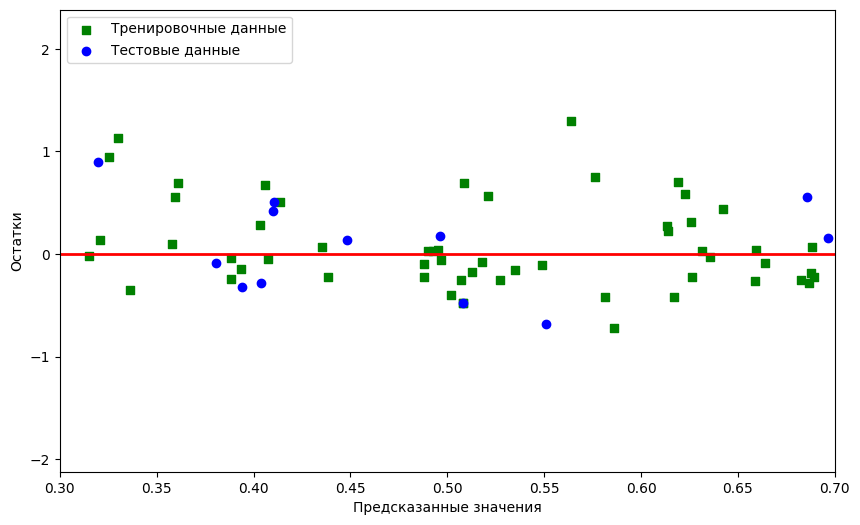

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_train_pred, y_train_pred - y_train, c='green', marker='s',
label='Тренировочные данные')
plt.scatter(y_test_pred, y_test_pred - y_test, c='blue', marker='o',
label='Тестовые данные')
plt.xlabel('Предсказанные значения')

plt.ylabel('Остатки')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-20, xmax=50, lw=2, color='red')
plt.xlim([0.3, 0.7])
plt.show()

Оценка через среднеквадратическую ошибку: мера MSE на обучающем наборе составляет 0.432, а на тестовом наборе – 0.499, что говорит о том, что в данном случае модель переобучилась.

In [ ]:
print('MSE при обучении:', mean_squared_error(y_train, y_train_pred))
print('MSE при испытании:', mean_squared_error(y_test, y_test_pred))

MSE при обучении: 0.4325189370648836
MSE при испытании: 0.49986668545508167


Оценка через коэффициент детерминации R^2: оценка при обучении составляет 0.608, а при испытании – 0.502. То, что R^2 на тестовом наборе меньше, чем на обучающем, говорит о том, что модель переобучилась.

In [ ]:
print('R^2 при обучении:', r2_score(y_train, y_train_pred))
print('R^2 при испытании:', r2_score(y_test, y_test_pred))

R^2 при обучении: 0.6082433914342179
R^2 при испытании: 0.5027993753727207


Применим регуляризованные методы для регрессии (гребневую регрессию, метод lasso и метод эластичной сети). Построим графики

Реализуем гребневую регрессию и построим график: на графике ниже видно, что результат метода гребневой регрессии несколько похож на результат линейной регрессии, это может быть связано с тем, что обе модели дают похожие предсказания, однако остатки распределены более концентрированно.

In [ ]:
ridge = Ridge(alpha=1.0)
ridge.fit(z_train, y_train)

y_train_pred = ridge.predict(z_train)
y_test_pred = ridge.predict(z_test)

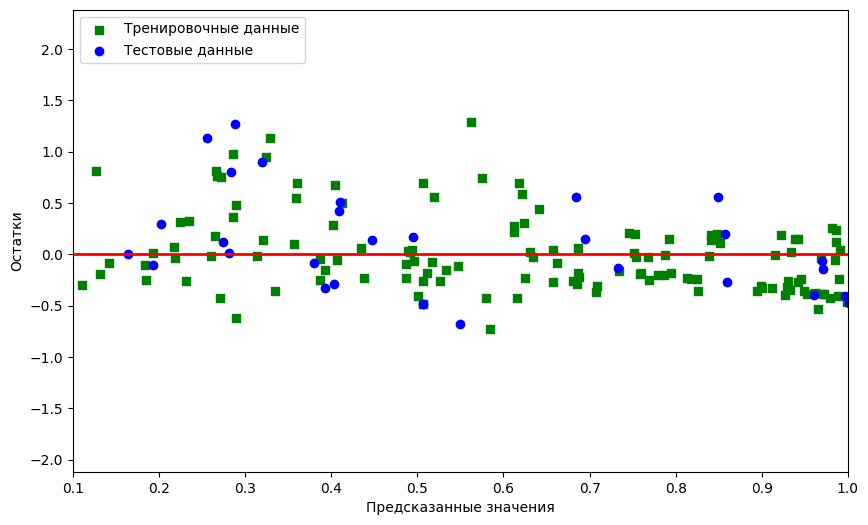

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_train_pred, y_train_pred - y_train, c='green', marker='s', label='Тренировочные данные')
plt.scatter(y_test_pred, y_test_pred - y_test, c='blue', marker='o', label='Тестовые данные')
plt.xlabel('Предсказанные значения')
plt.ylabel('Остатки')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-20, xmax=50, lw=2, color='red')
plt.xlim([0.1, 1])
plt.show()

Реализуем метод lasso и построим график: на графике ниже видно, что элементы выстраиваются в похожую на предыдущий график структуру.

In [ ]:
lasso = Lasso(alpha=0.001)
lasso.fit(z_train, y_train)

y_train_pred = lasso.predict(z_train)
y_test_pred = lasso.predict(z_test)
y_train_pred = y_train_pred.ravel()
y_train = y_train.ravel()
y_test_pred = y_test_pred.ravel()
y_test = y_test.ravel()

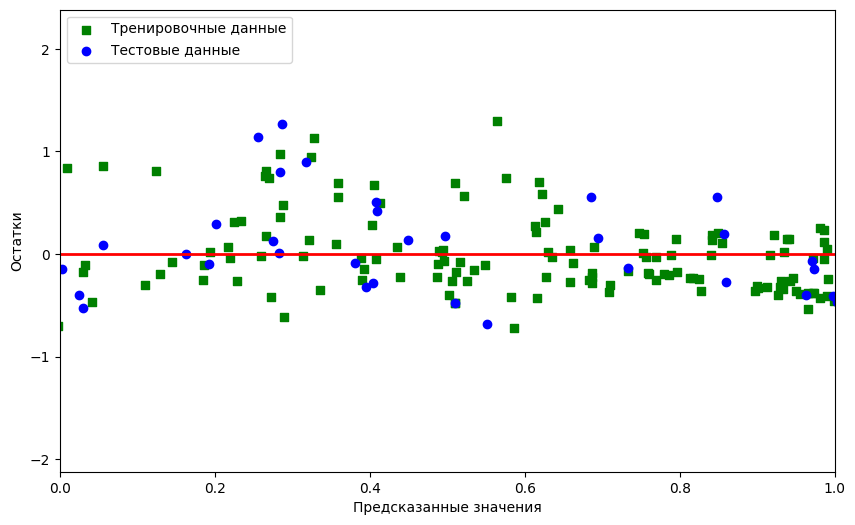

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_train_pred, y_train_pred - y_train, c='green', marker='s', label='Тренировочные данные')
plt.scatter(y_test_pred, y_test_pred - y_test, c='blue', marker='o', label='Тестовые данные')
plt.xlabel('Предсказанные значения')
plt.ylabel('Остатки')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-20, xmax=50, lw=2, color='red')
plt.xlim([0, 1])
plt.show()

Реализуем метод эластичной сети и построим график: на графике ниже видно, что остатки распределены случайно вокруг средней линии, заметно присутствие выбросов.

In [ ]:
elastic = ElasticNet(alpha=0.001, l1_ratio=0.1)
elastic.fit(z_train, y_train)

y_train_pred = elastic.predict(z_train)
y_test_pred = elastic.predict(z_test)

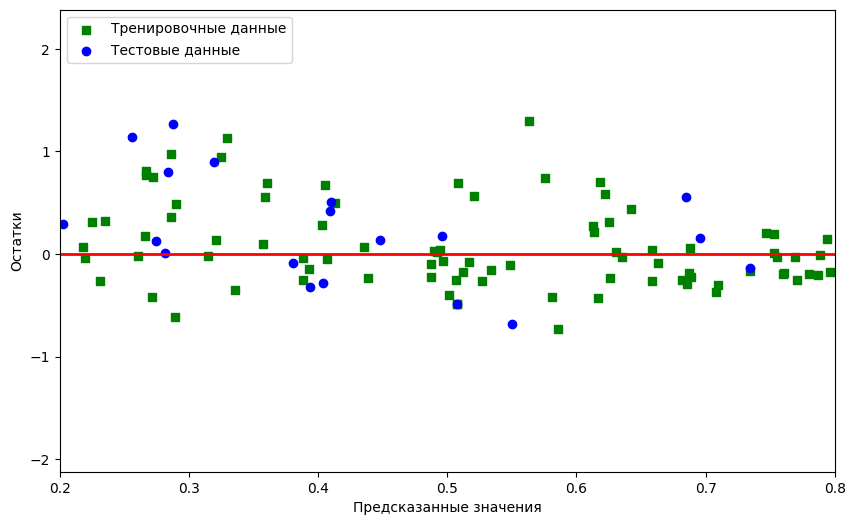

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_train_pred, y_train_pred - y_train, c='green', marker='s', label='Тренировочные данные')
plt.scatter(y_test_pred, y_test_pred - y_test, c='blue', marker='o', label='Тестовые данные')
plt.xlabel('Предсказанные значения')
plt.ylabel('Остатки')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-20, xmax=50, lw=2, color='red')
plt.xlim([0.2, 0.8])
plt.show()

Выполним подгонку множественной регрессионной модели для полиномиальной регрессии

Построим графики (сравним линейную регрессию и полиномиальную на одном графике)

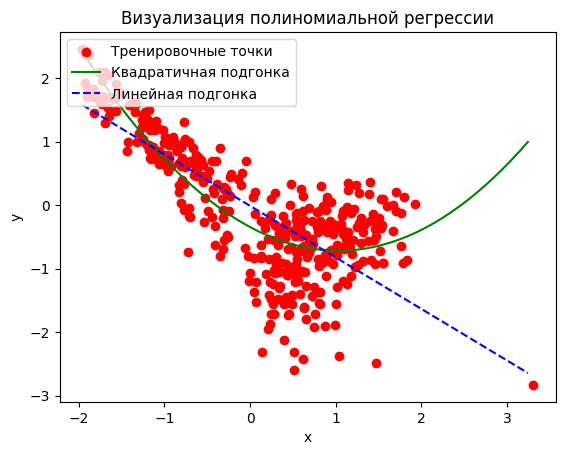

In [ ]:
poly_reg = PolynomialFeatures(degree=2)
z_poly = poly_reg.fit_transform(z_train)
lin_reg2 = LinearRegression()
lin_reg2.fit(z_poly, y_train)

feature_index = 0
z_grid = np.arange(np.min(z_train[:, feature_index]), np.max(z_train[:, feature_index]), 0.1)
z_grid = z_grid.reshape(len(z_grid), 1)

z_grid = np.hstack((z_grid, np.zeros(z_grid.shape)))


plt.scatter(z_train[:, feature_index], y_train, color='red', label='Тренировочные точки')

plt.plot(z_grid[:, 0], lin_reg2.predict(poly_reg.fit_transform(z_grid)), color ='green', label ='Квадратичная подгонка')

y_pred = slr.predict(z_grid)

plt.plot(z_grid[:, 0], y_pred, color='blue',label='Линейная подгонка', linestyle='--')

plt.legend (loc = 'upper left')
plt.title("Визуализация полиномиальной регрессии")
plt.xlabel('x')
plt.ylabel('y')
plt.show()


На графике визуализации полиномиальной регрессии выше видно, что полиномиальная подгонка не устанавливает связь между целевой переменной и зависимой переменной лучше, чем линейная.

1. **Примеры применения регрессионных моделей**:
   - **Линейная регрессия**: Когда нужно спрогнозировать, как повышение температуры влияет на потребление электроэнергии в городе.
   - **Логистическая регрессия**: При оценке вероятности того, что клиент совершит покупку на сайте после просмотра рекламного баннера.

2. **Как выбросы влияют на параметры линейной регрессии**:
   - Выбросы могут значительно сместить параметры модели, приводя к ненадежным предсказаниям, так как линейная регрессия стремится минимизировать сумму квадратов отклонений, и выбросы сильно увеличивают эту сумму.

3. **Суть регуляризации**:
   - Регуляризация помогает избежать переобучения путем добавления штрафа за слишком большие веса коэффициентов модели. Это заставляет модель выбирать более простые и обобщающие решения, уменьшая вероятность подстройки под шум в данных.

4. **Как оценить надежность прогностической модели**:
   - Надежность модели можно оценить с помощью метрик, таких как корень среднеквадратичной ошибки (RMSE) для стабильности модели.

5. **Ограничения линейных регрессионных моделей**:
   - Линейная регрессия не справляется с нелинейными зависимостями, может страдать от мультиколлинеарности, что приводит к нестабильности коэффициентов, и чувствительна к аномальным точкам данных (выбросам), которые могут сильно сместить результаты.

6. **Суть проблемы переобучения**:
   - Переобучение возникает, когда модель слишком тщательно подгоняется под особенности тренировочных данных, включая шум и нерелевантные детали, что приводит к снижению её способности обобщать на новые данные.

7. **Как решать проблемы переобучения**:
   - Применять регуляризацию (L1, L2), использовать больше данных для обучения, упрощать модель (например, уменьшать количество признаков или параметров), и проводить кросс-валидацию для более точной оценки модели.

8. **Диагностика проблем переобучения и недообучения**:
   - Для диагностики сравнивают ошибки на обучающем и тестовом наборах данных: высокая ошибка на тестовом наборе при низкой ошибке на обучающем указывает на переобучение; высокая ошибка на обоих наборах данных сигнализирует о недообучении.